In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
len(df)

663522

In [6]:
len(df.columns)

9

In [9]:
df['zip'].unique()

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 17752., 19111., 18927., 19435., 18951., 19472.,
       19503., 19126., 19505., 19423., 19138., 36107., 18036., 19116.,
       19139., 19129., 19115., 19355., 77316., 19457., 19082., 19127.,
       19443., 17555., 19520., 19063., 19020., 19404., 19382., 19474.,
      

In [10]:
df['zip'].nunique()

204

In [11]:
df.nunique()

lat           25949
lng           25980
desc         663282
zip             204
title           148
timeStamp    640754
twp              68
addr          41292
e                 1
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 32.9+ MB


# What are the top 5 townships (twp) for 911 calls.

In [17]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

# What are the top 5 zip codes for 911 calls.

In [18]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

# Take a look a "title" column, how many unique title codes are there?

In [19]:
df['title'].nunique()

148

# Creating new features

# In the titles column there are "Reasons/Departments" specified before the title code.These are Ems,fire,and Traffic.Create a new column called "Reason" that contain this string value.

In [33]:
x =df['title'].iloc[0]

In [35]:
x.split(':')[1]

' BACK PAINS/INJURY'

In [38]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [41]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

# What is the most common Reason for a 911 call based off of this new column? 

In [48]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

# Now use seaborn to create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='Reason', ylabel='count'>

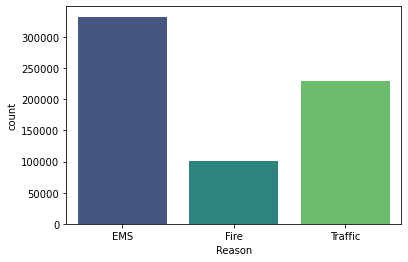

In [51]:
sns.countplot(x=df['Reason'],data=df,palette='viridis')

# What is the data type of the objects in the timeStamp column?

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 35.4+ MB


In [58]:
type(df['timeStamp'].iloc[0])

str

# Convert the above column from strings to DateTime objects.

In [61]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [62]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

# Grab specific attributes from a Datetime object by calling them. 

In [65]:
time=df['timeStamp'].iloc[0]
time.day

10

In [69]:
time.year

2015

In [70]:
time.hour

17

In [71]:
time.day_of_week

3

# Create 3 new columns called Hour,Month, and Day of Week. Create these columns based off of the timeStamp column.

In [73]:
df['Hour']= df['timeStamp'].apply (lambda time: time.hour)

In [74]:
 df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [75]:
df['Month']= df['timeStamp'].apply (lambda time: time.month)

In [76]:
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: Month, Length: 663522, dtype: int64

In [77]:
df['Day_of_week']= df['timeStamp'].apply (lambda time: time.day_of_week)

In [78]:
df['Day_of_week']

0         3
1         3
2         3
3         3
4         3
         ..
663517    2
663518    2
663519    2
663520    2
663521    2
Name: Day_of_week, Length: 663522, dtype: int64

In [79]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


# Use the .map() with a dictionary to map the actual string names to the day of the week

In [80]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [81]:
df['Day_of_week'] = df['Day_of_week'].map(dmap)

In [82]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur


# Use seaborn to craete a countplot of the Day of week column with hue based of the Reason column.

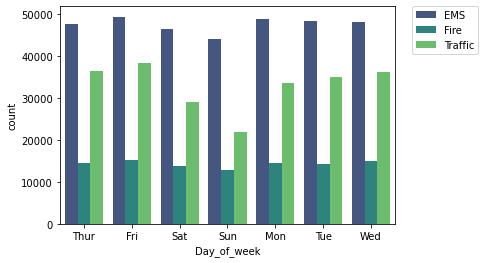

In [92]:
sns.countplot(x=df['Day_of_week'],data=df,hue=df['Reason'],palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

# Do the above for the month column

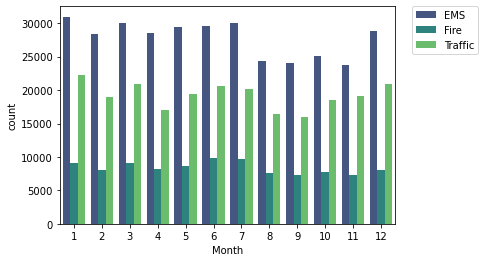

In [93]:
sns.countplot(x=df['Month'],data=df,hue=df['Reason'],palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

# Create a heatmap with the dataframe.

In [94]:
Tc = df.corr()

<AxesSubplot:>

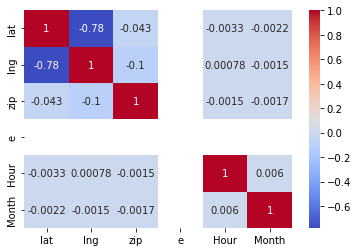

In [95]:
sns.heatmap(Tc,annot=True,cmap='coolwarm')

# Creat a clustermap using the dataframe.

In [109]:
Tcc =df.pivot_table(index='Reason',columns='Month',values='Hour')

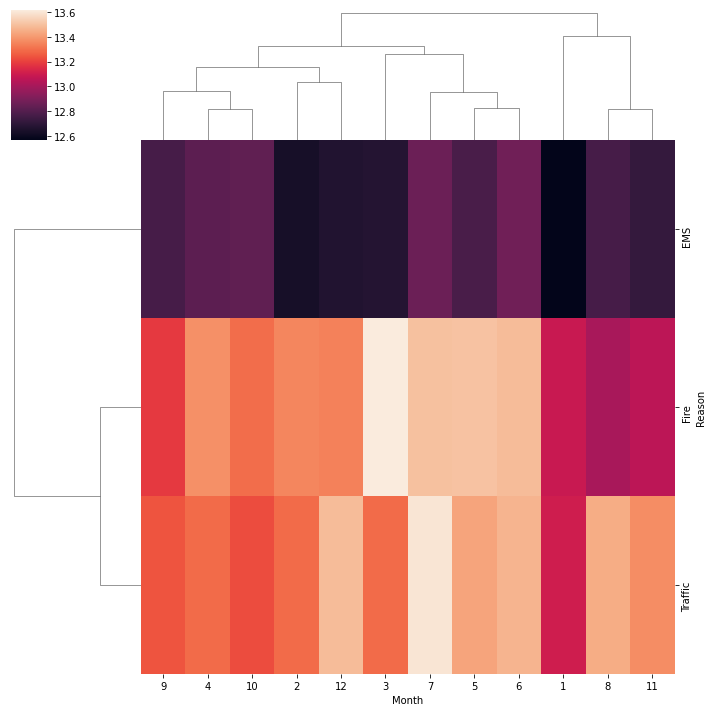

In [111]:
sns.clustermap(Tcc)